In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Spotify-data-processed.csv")

In [3]:
df.head()

,Unnamed: 0,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,Year,target
0,0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,...,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,60s,1
1,1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,...,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,60s,0
2,2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,...,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,60s,0
3,3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,...,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,60s,0
4,4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,...,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,60s,0


In [4]:
df.columns

Index(['Unnamed: 0', 'track', 'artist', 'uri', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature',
       'chorus_hit', 'sections', 'Year', 'target'],
      dtype='object')

In [5]:
df.drop(['Unnamed: 0','track','artist','uri','Year'],axis=1,inplace=True)

In [6]:
df.shape

(40901, 16)

In [7]:
sc=StandardScaler()

In [8]:
x=df.iloc[:,0:15].values
y=df.iloc[:,15].values

In [9]:
x_transform=sc.fit_transform(x)

In [10]:
from sklearn.model_selection import train_test_split


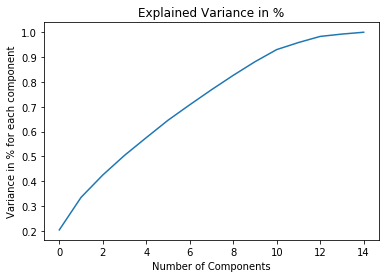

In [11]:
pca=PCA()
principalComponents=pca.fit_transform(x_transform)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Variance in % for each component")
plt.title("Explained Variance in %")
plt.show()

In [12]:
pca_final = PCA(n_components=10)
new_data = pca_final.fit_transform(x_transform)
principal_x=pd.DataFrame(new_data,columns=["PC-1","PC-2","PC-3","PC-4","PC-5","PC-6","PC-7","PC-8","PC-9","PC-10"])

In [13]:
principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10
0,-0.321764,-0.922498,0.834589,-1.931820,-0.925805,1.163465,2.004663,1.084581,-0.400461,-0.811765
1,-0.261438,-0.362347,-0.414374,-0.650037,0.354499,-0.998615,-0.017627,-0.143315,-0.002209,-0.145663
2,0.019568,-0.525738,-1.617485,-0.693412,0.253102,0.169465,0.284072,-0.383737,-0.696390,-0.483435
3,-0.144785,-1.310523,-1.535882,1.094952,-0.816786,0.914378,-0.353364,0.235731,0.285945,-0.614863
4,-0.969671,0.550727,-0.789805,1.409998,-0.739037,1.636599,-0.011589,-0.868039,0.106481,-0.457030
...,...,...,...,...,...,...,...,...,...,...
40896,3.582449,-0.843124,1.508793,0.475722,-0.583911,-0.138156,-1.801585,-1.438330,0.491928,1.107782
40897,-1.133280,-1.416335,-1.235801,-0.695144,1.090726,0.203148,-0.301435,0.557031,0.049773,-0.355655
40898,-1.972178,-0.420946,-0.348694,-0.141783,-1.051973,0.366333,0.161986,-0.975186,0.205641,1.055768
40899,2.633265,0.004752,-1.237360,-0.344524,-0.429993,0.840536,-1.012631,-0.013986,-1.055387,-0.131338


In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(principal_x,y,test_size=0.2,random_state=42)

In [15]:
estimator = XGBClassifier(
    objective= 'binary:logistic')

In [16]:
param_grid = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 20),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [17]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=param_grid,
    scoring = 'roc_auc',
    n_jobs = -1,
    cv = 10,
    verbose=True
)

In [18]:
grid_search.fit(X_train,Y_train)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 39.7min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed: 45.0min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_esti...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, 

In [19]:
grid_search.best_params_

{'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 200}

In [20]:
model=XGBClassifier(learning_rate = 0.05, max_depth = 9, n_estimators = 200)

In [21]:
model.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [22]:
y_pred=model.predict(X_test)


In [24]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,f1_score,roc_curve
accuracy_score(Y_test,y_pred)

0.7501527930570835

In [25]:
roc_auc_score(y_pred,Y_test)

0.75778467009674

In [26]:
confusion_matrix(Y_test,y_pred)

array([[2666, 1374],
       [ 670, 3471]], dtype=int64)

In [27]:
f1_score(y_pred,Y_test)

0.7725350545292676

In [28]:
fpr,tpr,threshold=roc_curve(y_pred,Y_test)

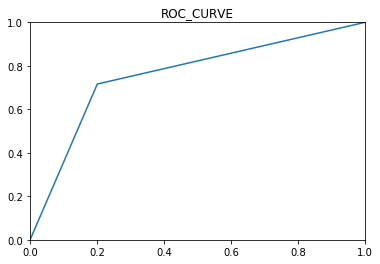

In [29]:
plt.plot(fpr,tpr)
plt.xlim(0,1)
plt.ylim(0,1)
plt.title("ROC_CURVE")
plt.show()

In [30]:
import pickle

In [31]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))


filename = 'Standard_scaler.sav'
pickle.dump(sc, open(filename, 'wb'))

filename = 'pca_model.sav'
pickle.dump(pca_final, open(filename, 'wb'))

In [32]:
filename = 'finalized_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.7501527930570835
